In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N = 100
D = 2
X = np.random.randn(N,D)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))
T = np.array([0]*50 + [1]*50)
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

In [20]:
# Xb

In [19]:
# Xb.T

In [9]:
w = np.random.randn(D + 1)

In [10]:
z = Xb.dot(w)

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
Y = sigmoid(z)

In [12]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [14]:
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print("error",i,"=",cross_entropy(T, Y) )
    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)
    # recalculate Y
    Y = sigmoid(Xb.dot(w))

error 0 = 217.738303554
error 10 = 6.9224169788
error 20 = 5.18200569871
error 30 = 3.48216109392
error 40 = 1.97145858943
error 50 = 0.969627302403
error 60 = 0.510726863324
error 70 = 0.315325226887
error 80 = 0.219962148004
error 90 = 0.166264468802


In [15]:
w

array([  5.9906967 ,  17.99945253,  10.39336213])

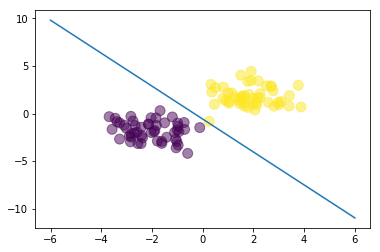

In [18]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()